# DATASETS ANALYSIS AND VISUALIZATION NOTEBOOK

In [42]:
import os
from pathlib import Path

# Data processing
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn' --> disables the false positive warning for orverwriting a dataframe when using inplace while droping columns
from sklearn.discriminant_analysis import StandardScaler
import numpy as np

# Data plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches #For the dummy legends

# Dimensionality reduction
from sklearn.decomposition import PCA

## IMPORT DATA
Concat probe information horitzontally

In [43]:
## IMPORT DATASET ##

probes = ["GSL", "NPL", "LTL", "AAL", "MAL", "SNA", "PNA", "WGA"] #HIERARCHICAL INDEX

#cellType1
path = "D:/LectinPAINT_Leukemia/KG1_resultsCris_withTau/cellInformation"
filenames = os.listdir(path) #Read filenames in path
dataset = pd.concat((pd.read_csv(path + '/' + f) for f in filenames), axis=1, keys=probes, levels=[probes]) #Read and append features csv horitzontally

#cellType2
path = "D:/LectinPAINT_Leukemia/HL60_resultsCris_withTau/cellInformation"
filenames = os.listdir(path) #Read filenames in path
dataset = pd.concat([dataset, pd.concat((pd.read_csv(path + '/' + f) for f in filenames), axis=1, keys=probes, levels=[probes])], ignore_index=True) #Read and append features csv horizontally and append the cell type to the previous dataframe vertically

#celltype3
path = "D:/LectinPAINT_Leukemia/Kasumi1_resultsCris_withTau/cellInformation"
filenames = os.listdir(path) #Read filenames in path
dataset = pd.concat([dataset, pd.concat((pd.read_csv(path + '/' + f) for f in filenames), axis=1, keys=probes, levels=[probes])], ignore_index=True) #Read and append features csv horizontally and append the cell type to the previous dataframe vertically

#### COLOR PALETTE ####
colorDictPre = {2:'#D0A7D6', 1:'#7099D1', 3:'#E9C61D'}
colorDict = {'HL-60':'#D0A7D6', 'KG-1':'#7099D1', 'Kasumi-1':'#E9C61D'}


## View dataset
dataset

GSL                                                    \
    Cell type Track displacement_Mean Track displacement_Median   
0           1                0.333650                  0.296120   
1           1                0.311343                  0.283877   
2           1                0.275025                  0.251956   
3           1                0.271703                  0.238662   
4           1                0.289683                  0.261958   
..        ...                     ...                       ...   
145         3                0.309949                  0.297079   
146         3                0.314384                  0.305396   
147         3                0.289976                  0.263042   
148         3                0.368681                  0.346678   
149         3                0.313570                  0.292613   

                                                                      \
    Track displacement_STD Track duration_Mean Track duration_Median   
0                 0.229119            0.325730                  0.25   
1                 0.196313            0.333119                  0.25   
2                 0.181587            0.314777                  0.25   
3                 0.184877            0.322083                  0.25   
4                 0.176717            0.320911                  0.25   
..                     ...                 ...                   ...   
145               0.198283            0.298790                  0.25   
146               0.209995            0.296650                  0.25   
147               0.204673            0.299006                  0.25   
148               0.232413            0.295987                  0.25   
149               0.220892            0.300906                  0.25   

                                                             \
    Track duration_STD Mean Directionality Change Rate_Mean   
0             0.181326                             1.276963   
1             0.190844                             1.239531   
2             0.138109                             1.217867   
3             0.171728                             1.244892   
4             0.173213                             1.265815   
..                 ...                                  ...   
145           0.144070                             1.133024   
146           0.141708                             1.078994   
147           0.149733                             1.089057   
148           0.137245                             1.193113   
149           0.152724                             1.115083   

                                            \
    Mean Directionality Change Rate_Median   
0                                 1.311122   
1                                 1.260877   
2                                 1.233112   
3                                 1.276205   
4                                 1.289361   
..                                     ...   
145                               1.134554   
146                               1.105909   
147                               1.074818   
148                               1.225380   
149                               1.105619   

                                         ...                      WGA  \
    Mean Directionality Change Rate_STD  ... Confinement Ratio_Median   
0                              0.417871  ...                 0.437734   
1                              0.438082  ...                 0.449149   
2                              0.438300  ...                 0.467471   
3                              0.427424  ...                 0.450430   
4                              0.403632  ...                 0.448021   
..                                  ...  ...                      ...   
145                            0.444352  ...                 0.453428   
146                            0.400612  ...                 0.456115   
147                            0.435658  ...        

In [44]:
# Drop TAU column completely instead of the NaNs --> use the track length as an equivalent
## Drop non-features columns ##
dataset = dataset.drop(['Tau'], axis=1, level=1) #Drop all label columns in level 1 (children) from the dataframe
dataset

GSL                                                    \
    Cell type Track displacement_Mean Track displacement_Median   
0           1                0.333650                  0.296120   
1           1                0.311343                  0.283877   
2           1                0.275025                  0.251956   
3           1                0.271703                  0.238662   
4           1                0.289683                  0.261958   
..        ...                     ...                       ...   
145         3                0.309949                  0.297079   
146         3                0.314384                  0.305396   
147         3                0.289976                  0.263042   
148         3                0.368681                  0.346678   
149         3                0.313570                  0.292613   

                                                                      \
    Track displacement_STD Track duration_Mean Track duration_Median   
0                 0.229119            0.325730                  0.25   
1                 0.196313            0.333119                  0.25   
2                 0.181587            0.314777                  0.25   
3                 0.184877            0.322083                  0.25   
4                 0.176717            0.320911                  0.25   
..                     ...                 ...                   ...   
145               0.198283            0.298790                  0.25   
146               0.209995            0.296650                  0.25   
147               0.204673            0.299006                  0.25   
148               0.232413            0.295987                  0.25   
149               0.220892            0.300906                  0.25   

                                                             \
    Track duration_STD Mean Directionality Change Rate_Mean   
0             0.181326                             1.276963   
1             0.190844                             1.239531   
2             0.138109                             1.217867   
3             0.171728                             1.244892   
4             0.173213                             1.265815   
..                 ...                                  ...   
145           0.144070                             1.133024   
146           0.141708                             1.078994   
147           0.149733                             1.089057   
148           0.137245                             1.193113   
149           0.152724                             1.115083   

                                            \
    Mean Directionality Change Rate_Median   
0                                 1.311122   
1                                 1.260877   
2                                 1.233112   
3                                 1.276205   
4                                 1.289361   
..                                     ...   
145                               1.134554   
146                               1.105909   
147                               1.074818   
148                               1.225380   
149                               1.105619   

                                         ...                    WGA  \
    Mean Directionality Change Rate_STD  ... Confinement Ratio_Mean   
0                              0.417871  ...               0.463912   
1                              0.438082  ...               0.469916   
2                              0.438300  ...               0.485347   
3                              0.427424  ...               0.469187   
4                              0.403632  ...               0.468831   
..                                  ...  ...                    ...   
145                            0.444352  ...               0.464693   
146                            0.400612  ...               0.469567   
147                            0.435658  ...               0.455462   
1

In [45]:
dataset.columns # Show columns

MultiIndex([('GSL',                               'Cell type'),
            ('GSL',                 'Track displacement_Mean'),
            ('GSL',               'Track displacement_Median'),
            ('GSL',                  'Track displacement_STD'),
            ('GSL',                     'Track duration_Mean'),
            ('GSL',                   'Track duration_Median'),
            ('GSL',                      'Track duration_STD'),
            ('GSL',    'Mean Directionality Change Rate_Mean'),
            ('GSL',  'Mean Directionality Change Rate_Median'),
            ('GSL',     'Mean Directionality Change Rate_STD'),
            ...
            ('WGA',                  'Confinement Ratio_Mean'),
            ('WGA',                'Confinement Ratio_Median'),
            ('WGA',                   'Confinement Ratio_STD'),
            ('WGA',           'Mean Straight Line Speed_Mean'),
            ('WGA',         'Mean Straight Line Speed_Median'),
            ('WGA',     

## PRE-PROCESS DATA

Drop columns, cut outliers, calculate other features... adapt the cells to your own dataset.
Create your own color palette by using a dictionary with sampleName:color (as in the examples)

In [46]:
## Remove NaN values --> cells for which the Tau couldn't be fitted ##
dataset.dropna(ignore_index=True, inplace=True)
dataset

GSL                                                    \
    Cell type Track displacement_Mean Track displacement_Median   
0           1                0.333650                  0.296120   
1           1                0.311343                  0.283877   
2           1                0.275025                  0.251956   
3           1                0.271703                  0.238662   
4           1                0.289683                  0.261958   
..        ...                     ...                       ...   
145         3                0.309949                  0.297079   
146         3                0.314384                  0.305396   
147         3                0.289976                  0.263042   
148         3                0.368681                  0.346678   
149         3                0.313570                  0.292613   

                                                                      \
    Track displacement_STD Track duration_Mean Track duration_Median   
0                 0.229119            0.325730                  0.25   
1                 0.196313            0.333119                  0.25   
2                 0.181587            0.314777                  0.25   
3                 0.184877            0.322083                  0.25   
4                 0.176717            0.320911                  0.25   
..                     ...                 ...                   ...   
145               0.198283            0.298790                  0.25   
146               0.209995            0.296650                  0.25   
147               0.204673            0.299006                  0.25   
148               0.232413            0.295987                  0.25   
149               0.220892            0.300906                  0.25   

                                                             \
    Track duration_STD Mean Directionality Change Rate_Mean   
0             0.181326                             1.276963   
1             0.190844                             1.239531   
2             0.138109                             1.217867   
3             0.171728                             1.244892   
4             0.173213                             1.265815   
..                 ...                                  ...   
145           0.144070                             1.133024   
146           0.141708                             1.078994   
147           0.149733                             1.089057   
148           0.137245                             1.193113   
149           0.152724                             1.115083   

                                            \
    Mean Directionality Change Rate_Median   
0                                 1.311122   
1                                 1.260877   
2                                 1.233112   
3                                 1.276205   
4                                 1.289361   
..                                     ...   
145                               1.134554   
146                               1.105909   
147                               1.074818   
148                               1.225380   
149                               1.105619   

                                         ...                    WGA  \
    Mean Directionality Change Rate_STD  ... Confinement Ratio_Mean   
0                              0.417871  ...               0.463912   
1                              0.438082  ...               0.469916   
2                              0.438300  ...               0.485347   
3                              0.427424  ...               0.469187   
4                              0.403632  ...               0.468831   
..                                  ...  ...                    ...   
145                            0.444352  ...               0.464693   
146                            0.400612  ...               0.469567   
147                            0.435658  ...               0.455462   
1

### ADD LABEL COLUMN

In [47]:
datasetL = dataset # Backup the original dataset
datasetL['label'] = datasetL['AAL']['Cell type'] #Save the label in a new column, key index in level 0 (parent) | cell code (1 = KG-1, 2 = HL-60, 3= Kasumi-1)
datasetL

GSL                                                    \
    Cell type Track displacement_Mean Track displacement_Median   
0           1                0.333650                  0.296120   
1           1                0.311343                  0.283877   
2           1                0.275025                  0.251956   
3           1                0.271703                  0.238662   
4           1                0.289683                  0.261958   
..        ...                     ...                       ...   
145         3                0.309949                  0.297079   
146         3                0.314384                  0.305396   
147         3                0.289976                  0.263042   
148         3                0.368681                  0.346678   
149         3                0.313570                  0.292613   

                                                                      \
    Track displacement_STD Track duration_Mean Track duration_Median   
0                 0.229119            0.325730                  0.25   
1                 0.196313            0.333119                  0.25   
2                 0.181587            0.314777                  0.25   
3                 0.184877            0.322083                  0.25   
4                 0.176717            0.320911                  0.25   
..                     ...                 ...                   ...   
145               0.198283            0.298790                  0.25   
146               0.209995            0.296650                  0.25   
147               0.204673            0.299006                  0.25   
148               0.232413            0.295987                  0.25   
149               0.220892            0.300906                  0.25   

                                                             \
    Track duration_STD Mean Directionality Change Rate_Mean   
0             0.181326                             1.276963   
1             0.190844                             1.239531   
2             0.138109                             1.217867   
3             0.171728                             1.244892   
4             0.173213                             1.265815   
..                 ...                                  ...   
145           0.144070                             1.133024   
146           0.141708                             1.078994   
147           0.149733                             1.089057   
148           0.137245                             1.193113   
149           0.152724                             1.115083   

                                            \
    Mean Directionality Change Rate_Median   
0                                 1.311122   
1                                 1.260877   
2                                 1.233112   
3                                 1.276205   
4                                 1.289361   
..                                     ...   
145                               1.134554   
146                               1.105909   
147                               1.074818   
148                               1.225380   
149                               1.105619   

                                         ...                      WGA  \
    Mean Directionality Change Rate_STD  ... Confinement Ratio_Median   
0                              0.417871  ...                 0.437734   
1                              0.438082  ...                 0.449149   
2                              0.438300  ...                 0.467471   
3                              0.427424  ...                 0.450430   
4                              0.403632  ...                 0.448021   
..                                  ...  ...                      ...   
145                            0.444352  ...                 0.453428   
146                            0.400612  ...                 0.456115   
147                            0.435658  ...        

In [48]:
datasetL.loc[ datasetL['label'] == 1, 'label'] = 'KG-1' #Change cell code for the corresponding cell type
datasetL.loc[ datasetL['label'] == 2, 'label'] = 'HL-60' #Change cell code for the corresponding cell type
datasetL.loc[ datasetL['label'] == 3, 'label'] = 'Kasumi-1' #Change cell code for the corresponding cell type
datasetL

C:\Users\20210014\AppData\Local\Temp\ipykernel_13000\1523501150.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'KG-1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  datasetL.loc[ datasetL['label'] == 1, 'label'] = 'KG-1' #Change cell code for the corresponding cell type


GSL                                                    \
    Cell type Track displacement_Mean Track displacement_Median   
0           1                0.333650                  0.296120   
1           1                0.311343                  0.283877   
2           1                0.275025                  0.251956   
3           1                0.271703                  0.238662   
4           1                0.289683                  0.261958   
..        ...                     ...                       ...   
145         3                0.309949                  0.297079   
146         3                0.314384                  0.305396   
147         3                0.289976                  0.263042   
148         3                0.368681                  0.346678   
149         3                0.313570                  0.292613   

                                                                      \
    Track displacement_STD Track duration_Mean Track duration_Median   
0                 0.229119            0.325730                  0.25   
1                 0.196313            0.333119                  0.25   
2                 0.181587            0.314777                  0.25   
3                 0.184877            0.322083                  0.25   
4                 0.176717            0.320911                  0.25   
..                     ...                 ...                   ...   
145               0.198283            0.298790                  0.25   
146               0.209995            0.296650                  0.25   
147               0.204673            0.299006                  0.25   
148               0.232413            0.295987                  0.25   
149               0.220892            0.300906                  0.25   

                                                             \
    Track duration_STD Mean Directionality Change Rate_Mean   
0             0.181326                             1.276963   
1             0.190844                             1.239531   
2             0.138109                             1.217867   
3             0.171728                             1.244892   
4             0.173213                             1.265815   
..                 ...                                  ...   
145           0.144070                             1.133024   
146           0.141708                             1.078994   
147           0.149733                             1.089057   
148           0.137245                             1.193113   
149           0.152724                             1.115083   

                                            \
    Mean Directionality Change Rate_Median   
0                                 1.311122   
1                                 1.260877   
2                                 1.233112   
3                                 1.276205   
4                                 1.289361   
..                                     ...   
145                               1.134554   
146                               1.105909   
147                               1.074818   
148                               1.225380   
149                               1.105619   

                                         ...                      WGA  \
    Mean Directionality Change Rate_STD  ... Confinement Ratio_Median   
0                              0.417871  ...                 0.437734   
1                              0.438082  ...                 0.449149   
2                              0.438300  ...                 0.467471   
3                              0.427424  ...                 0.450430   
4                              0.403632  ...                 0.448021   
..                                  ...  ...                      ...   
145                            0.444352  ...                 0.453428   
146                            0.400612  ...                 0.456115   
147                            0.435658  ...        

In [49]:
## Drop non-features columns ##
datasetL = datasetL.drop(['Cell type'], axis=1, level=1) #Drop all label columns in level 1 (children) from the dataframe
datasetL

GSL                                                   \
    Track displacement_Mean Track displacement_Median Track displacement_STD   
0                  0.333650                  0.296120               0.229119   
1                  0.311343                  0.283877               0.196313   
2                  0.275025                  0.251956               0.181587   
3                  0.271703                  0.238662               0.184877   
4                  0.289683                  0.261958               0.176717   
..                      ...                       ...                    ...   
145                0.309949                  0.297079               0.198283   
146                0.314384                  0.305396               0.209995   
147                0.289976                  0.263042               0.204673   
148                0.368681                  0.346678               0.232413   
149                0.313570                  0.292613               0.220892   

                                                                  \
    Track duration_Mean Track duration_Median Track duration_STD   
0              0.325730                  0.25           0.181326   
1              0.333119                  0.25           0.190844   
2              0.314777                  0.25           0.138109   
3              0.322083                  0.25           0.171728   
4              0.320911                  0.25           0.173213   
..                  ...                   ...                ...   
145            0.298790                  0.25           0.144070   
146            0.296650                  0.25           0.141708   
147            0.299006                  0.25           0.149733   
148            0.295987                  0.25           0.137245   
149            0.300906                  0.25           0.152724   

                                          \
    Mean Directionality Change Rate_Mean   
0                               1.276963   
1                               1.239531   
2                               1.217867   
3                               1.244892   
4                               1.265815   
..                                   ...   
145                             1.133024   
146                             1.078994   
147                             1.089057   
148                             1.193113   
149                             1.115083   

                                            \
    Mean Directionality Change Rate_Median   
0                                 1.311122   
1                                 1.260877   
2                                 1.233112   
3                                 1.276205   
4                                 1.289361   
..                                     ...   
145                               1.134554   
146                               1.105909   
147                               1.074818   
148                               1.225380   
149                               1.105619   

                                                                       ...  \
    Mean Directionality Change Rate_STD Total Distance Travelled_Mean  ...   
0                              0.417871                      0.692964  ...   
1                              0.438082                      0.651272  ...   
2                              0.438300                      0.569758  ...   
3                              0.427424                      0.583840  ...   
4                              0.403632                      0.609073  ...   
..                                  ...                           ...  ...   
145                            0.444352                      0.618370  ...   
146                            0.400612                      0.608552  ...   
147                            0.435658                      0.587116  ...   
148                            0.440300                      0.70544

### Drop extra columns

In [50]:
## Remove density (to test its importance)
dataset_nD = datasetL.drop(['Density'], axis=1, level=1)
dataset_nD #Show dataset

GSL                                                   \
    Track displacement_Mean Track displacement_Median Track displacement_STD   
0                  0.333650                  0.296120               0.229119   
1                  0.311343                  0.283877               0.196313   
2                  0.275025                  0.251956               0.181587   
3                  0.271703                  0.238662               0.184877   
4                  0.289683                  0.261958               0.176717   
..                      ...                       ...                    ...   
145                0.309949                  0.297079               0.198283   
146                0.314384                  0.305396               0.209995   
147                0.289976                  0.263042               0.204673   
148                0.368681                  0.346678               0.232413   
149                0.313570                  0.292613               0.220892   

                                                                  \
    Track duration_Mean Track duration_Median Track duration_STD   
0              0.325730                  0.25           0.181326   
1              0.333119                  0.25           0.190844   
2              0.314777                  0.25           0.138109   
3              0.322083                  0.25           0.171728   
4              0.320911                  0.25           0.173213   
..                  ...                   ...                ...   
145            0.298790                  0.25           0.144070   
146            0.296650                  0.25           0.141708   
147            0.299006                  0.25           0.149733   
148            0.295987                  0.25           0.137245   
149            0.300906                  0.25           0.152724   

                                          \
    Mean Directionality Change Rate_Mean   
0                               1.276963   
1                               1.239531   
2                               1.217867   
3                               1.244892   
4                               1.265815   
..                                   ...   
145                             1.133024   
146                             1.078994   
147                             1.089057   
148                             1.193113   
149                             1.115083   

                                            \
    Mean Directionality Change Rate_Median   
0                                 1.311122   
1                                 1.260877   
2                                 1.233112   
3                                 1.276205   
4                                 1.289361   
..                                     ...   
145                               1.134554   
146                               1.105909   
147                               1.074818   
148                               1.225380   
149                               1.105619   

                                                                       ...  \
    Mean Directionality Change Rate_STD Total Distance Travelled_Mean  ...   
0                              0.417871                      0.692964  ...   
1                              0.438082                      0.651272  ...   
2                              0.438300                      0.569758  ...   
3                              0.427424                      0.583840  ...   
4                              0.403632                      0.609073  ...   
..                                  ...                           ...  ...   
145                            0.444352                      0.618370  ...   
146                            0.400612                      0.608552  ...   
147                            0.435658                      0.587116  ...   
148                            0.440300                      0.70544

## Flatten the multiIndex 

In [51]:
datasetL.columns # Show columns

MultiIndex([(  'GSL',                 'Track displacement_Mean'),
            (  'GSL',               'Track displacement_Median'),
            (  'GSL',                  'Track displacement_STD'),
            (  'GSL',                     'Track duration_Mean'),
            (  'GSL',                   'Track duration_Median'),
            (  'GSL',                      'Track duration_STD'),
            (  'GSL',    'Mean Directionality Change Rate_Mean'),
            (  'GSL',  'Mean Directionality Change Rate_Median'),
            (  'GSL',     'Mean Directionality Change Rate_STD'),
            (  'GSL',           'Total Distance Travelled_Mean'),
            ...
            (  'WGA',                'Confinement Ratio_Median'),
            (  'WGA',                   'Confinement Ratio_STD'),
            (  'WGA',           'Mean Straight Line Speed_Mean'),
            (  'WGA',         'Mean Straight Line Speed_Median'),
            (  'WGA',            'Mean Straight Line Speed_S

In [52]:
datasetL.columns = ["_".join(a) for a in datasetL.columns.to_flat_index()] #Flatten and rename at the same time to convert from tuple to string
datasetL.columns

Index(['GSL_Track displacement_Mean', 'GSL_Track displacement_Median',
       'GSL_Track displacement_STD', 'GSL_Track duration_Mean',
       'GSL_Track duration_Median', 'GSL_Track duration_STD',
       'GSL_Mean Directionality Change Rate_Mean',
       'GSL_Mean Directionality Change Rate_Median',
       'GSL_Mean Directionality Change Rate_STD',
       'GSL_Total Distance Travelled_Mean',
       ...
       'WGA_Confinement Ratio_Median', 'WGA_Confinement Ratio_STD',
       'WGA_Mean Straight Line Speed_Mean',
       'WGA_Mean Straight Line Speed_Median',
       'WGA_Mean Straight Line Speed_STD',
       'WGA_Linearity of Forward Progression_Mean',
       'WGA_Linearity of Forward Progression_Median',
       'WGA_Linearity of Forward Progression_STD', 'WGA_Density', 'label_'],
      dtype='object', length=345)

In [53]:
dataset_nD.columns = ["_".join(a) for a in dataset_nD.columns.to_flat_index()] #Flatten and rename at the same time to convert from tuple to string
dataset_nD.columns

Index(['GSL_Track displacement_Mean', 'GSL_Track displacement_Median',
       'GSL_Track displacement_STD', 'GSL_Track duration_Mean',
       'GSL_Track duration_Median', 'GSL_Track duration_STD',
       'GSL_Mean Directionality Change Rate_Mean',
       'GSL_Mean Directionality Change Rate_Median',
       'GSL_Mean Directionality Change Rate_STD',
       'GSL_Total Distance Travelled_Mean',
       ...
       'WGA_Confinement Ratio_Mean', 'WGA_Confinement Ratio_Median',
       'WGA_Confinement Ratio_STD', 'WGA_Mean Straight Line Speed_Mean',
       'WGA_Mean Straight Line Speed_Median',
       'WGA_Mean Straight Line Speed_STD',
       'WGA_Linearity of Forward Progression_Mean',
       'WGA_Linearity of Forward Progression_Median',
       'WGA_Linearity of Forward Progression_STD', 'label_'],
      dtype='object', length=337)

## Dimensionality Reduction

### Pre-processing

In [54]:
dataset_nD # Show dataset

,GSL_Track displacement_Mean,GSL_Track displacement_Median,GSL_Track displacement_STD,GSL_Track duration_Mean,GSL_Track duration_Median,GSL_Track duration_STD,GSL_Mean Directionality Change Rate_Mean,GSL_Mean Directionality Change Rate_Median,GSL_Mean Directionality Change Rate_STD,GSL_Total Distance Travelled_Mean,...,WGA_Confinement Ratio_Mean,WGA_Confinement Ratio_Median,WGA_Confinement Ratio_STD,WGA_Mean Straight Line Speed_Mean,WGA_Mean Straight Line Speed_Median,WGA_Mean Straight Line Speed_STD,WGA_Linearity of Forward Progression_Mean,WGA_Linearity of Forward Progression_Median,WGA_Linearity of Forward Progression_STD,label_
0,0.333650,0.296120,0.229119,0.325730,0.25,0.181326,1.276963,1.311122,0.417871,0.692964,...,0.463912,0.437734,0.264786,1.165787,0.936236,0.882669,0.371348,0.357185,0.204239,KG-1
1,0.311343,0.283877,0.196313,0.333119,0.25,0.190844,1.239531,1.260877,0.438082,0.651272,...,0.469916,0.449149,0.258320,1.400902,1.188626,1.000382,0.375011,0.364501,0.198492,KG-1
2,0.275025,0.251956,0.181587,0.314777,0.25,0.138109,1.217867,1.233112,0.438300,0.569758,...,0.485347,0.467471,0.260577,1.095710,0.925588,0.761677,0.383225,0.373303,0.198429,KG-1
3,0.271703,0.238662,0.184877,0.322083,0.25,0.171728,1.244892,1.276205,0.427424,0.583840,...,0.469187,0.450430,0.258345,1.177207,0.976069,0.853425,0.373659,0.363663,0.199245,KG-1
4,0.289683,0.261958,0.176717,0.320911,0.25,0.173213,1.265815,1.289361,0.403632,0.609073,...,0.468831,0.448021,0.260771,0.987921,0.853270,0.676507,0.374063,0.362431,0.200261,KG-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.309949,0.297079,0.198283,0.298790,0.25,0.144070,1.133024,1.134554,0.444352,0.618370,...,0.464693,0.453428,0.289888,1.276640,1.040773,1.032069,0.372140,0.367233,0.227234,Kasumi-1
146,0.314384,0.305396,0.209995,0.296650,0.25,0.141708,1.078994,1.105909,0.400612,0.608552,...,0.469567,0.456115,0.293088,1.179141,0.975940,0.941893,0.381121,0.378083,0.233119,Kasumi-1
147,0.289976,0.263042,0.204673,0.299006,0.25,0.149733,1.089057,1.074818,0.435658,0.587116,...,0.455462,0.437482,0.294029,1.055442,0.859475,0.882467,0.369324,0.360489,0.233101,Kasumi-1
148,0.368681,0.346678,0.232413,0.295987,0.25,0.137245,1.193113,1.225380,0.440300,0.705446,...,0.480522,0.480630,0.309132,1.251766,1.021800,1.071900,0.387623,0.396994,0.244318,Kasumi-1


In [55]:
## Set the dataset to use ##
data_toUse = datasetL # select __ dataset_nD __ instead when we don't want to use the density or __ datasetL __ when we want to use the Density values
string = 'withDensity2' # Add to the plot title information on your dataset --> withoutDensity

In [56]:
## Prepare the dataset for clustering algorithms ##
features = data_toUse.columns.values
features = np.delete(features, -1) #Delete the last element (column 'label')
data = data_toUse.loc[:, features].values # Separating out the features
scaledX = StandardScaler().fit_transform(data) # Standardize data (mean and std is 0)
target = data_toUse.loc[:, 'label_'].values #Separating the label column (sample type)
features # Show features

array(['GSL_Track displacement_Mean', 'GSL_Track displacement_Median',
       'GSL_Track displacement_STD', 'GSL_Track duration_Mean',
       'GSL_Track duration_Median', 'GSL_Track duration_STD',
       'GSL_Mean Directionality Change Rate_Mean',
       'GSL_Mean Directionality Change Rate_Median',
       'GSL_Mean Directionality Change Rate_STD',
       'GSL_Total Distance Travelled_Mean',
       'GSL_Total Distance Travelled_Median',
       'GSL_Total Distance Travelled_STD',
       'GSL_Max Distance Travelled_Mean',
       'GSL_Max Distance Travelled_Median',
       'GSL_Max Distance Travelled_STD', 'GSL_Mean Track Speed_Mean',
       'GSL_Mean Track Speed_Median', 'GSL_Mean Track Speed_STD',
       'GSL_Minimum Track Speed_Mean', 'GSL_Minimum Track Speed_Median',
       'GSL_Minimum Track Speed_STD', 'GSL_Maximum Track Speed_Mean',
       'GSL_Maximum Track Speed_Median', 'GSL_Maximum Track Speed_STD',
       'GSL_Median Track Speed_Mean', 'GSL_Median Track Speed_Median',
       '

In [57]:
## Get unique names for samples
uniqueLabels = list(set(target)) #Get our labels
uniqueLabels = sorted(uniqueLabels)
uniqueLabels # Show labels

['HL-60', 'KG-1', 'Kasumi-1']

In [58]:
data_toUse.groupby("label_").size() # Check (im)balance

label_
HL-60       50
KG-1        50
Kasumi-1    50
dtype: int64

### PCA

In [59]:
# Calculate PCA scores
pcaTotal = PCA()
principalComponents = pcaTotal.fit_transform(scaledX)

In [60]:
pca_df = pd.DataFrame({'pca_1': principalComponents[:,0], 'pca_2': principalComponents[:,1], 'label': target}) # Get the 2 PC for the scatter plot

In [74]:
# Calculate the feature importance based on the loadings
featureImportanceTotal = pd.DataFrame(data=pcaTotal.components_, columns=features)
print(featureImportanceTotal.abs().idxmax(axis=1).head(10))
featureImportanceTotal

0                       WGA_Mean Track Speed_STD
1       LTL_Mean Directionality Change Rate_Mean
2                      GSL_Mean Track Speed_Mean
3                    AAL_Mean Track Speed_Median
4      LTL_Linearity of Forward Progression_Mean
5            PNA_Mean Straight Line Speed_Median
6    SNA_Linearity of Forward Progression_Median
7                   PNA_Confinement Ratio_Median
8                      SNA_Confinement Ratio_STD
9                     GSL_Confinement Ratio_Mean
dtype: object


,GSL_Track displacement_Mean,GSL_Track displacement_Median,GSL_Track displacement_STD,GSL_Track duration_Mean,GSL_Track duration_Median,GSL_Track duration_STD,GSL_Mean Directionality Change Rate_Mean,GSL_Mean Directionality Change Rate_Median,GSL_Mean Directionality Change Rate_STD,GSL_Total Distance Travelled_Mean,...,WGA_Confinement Ratio_Mean,WGA_Confinement Ratio_Median,WGA_Confinement Ratio_STD,WGA_Mean Straight Line Speed_Mean,WGA_Mean Straight Line Speed_Median,WGA_Mean Straight Line Speed_STD,WGA_Linearity of Forward Progression_Mean,WGA_Linearity of Forward Progression_Median,WGA_Linearity of Forward Progression_STD,WGA_Density
0,0.034708,0.039646,0.019642,-0.017321,-0.008023,-0.009610,-0.000165,-0.002480,0.007953,0.012892,...,0.056404,0.057761,0.005335,0.084096,0.078018,0.089064,0.051306,0.050925,0.001407,0.007218
1,-0.067547,-0.023665,-0.039632,0.039406,0.055087,0.030710,-0.107019,-0.104730,-0.029873,-0.078695,...,-0.042509,-0.033824,0.084907,-0.021027,-0.033970,0.013532,-0.048570,-0.037458,0.086195,-0.071541
2,-0.095123,-0.053803,-0.109744,0.102955,0.079099,0.089118,-0.005809,-0.003772,-0.019937,-0.070958,...,0.046651,0.038564,-0.042839,0.048209,0.056948,0.017463,0.040661,0.034382,-0.047437,0.015456
3,0.029641,0.023690,0.037003,0.021099,0.032219,0.008229,0.039168,0.036072,-0.048553,0.054883,...,-0.051230,-0.040648,-0.003076,-0.079876,-0.077301,-0.071821,-0.049878,-0.036584,-0.003797,-0.015836
4,0.067046,0.096531,0.054644,0.010467,0.022902,0.005651,0.038724,0.048097,0.051155,0.077391,...,0.046586,0.065930,0.073925,0.009348,0.007748,0.013280,0.057759,0.081944,0.076861,-0.014061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,-0.002675,0.000623,-0.052780,-0.031406,0.027490,-0.024696,0.033689,-0.031055,0.023929,0.004552,...,0.081529,-0.019944,0.056579,0.036374,-0.100549,0.086828,0.074767,-0.014974,-0.035063,0.017477
146,0.013602,-0.037341,-0.021790,-0.006211,-0.039867,-0.057242,0.035103,-0.043779,0.041923,0.022053,...,-0.008859,0.014380,0.019955,-0.024037,0.030143,-0.062845,-0.007303,0.014298,-0.053691,-0.056780
147,-0.121477,-0.065699,-0.015187,-0.006817,-0.057050,-0.063609,0.024599,0.017870,0.043890,0.014860,...,0.013942,-0.084130,0.043398,-0.019123,-0.086914,-0.004474,-0.010261,0.040038,0.040251,0.057833
148,-0.001521,-0.037582,0.021611,-0.012119,-0.005867,0.038735,0.111947,-0.035808,-0.023437,0.061259,...,-0.027602,0.013966,0.029555,0.006501,0.106883,-0.127753,-0.040310,-0.015709,0.050406,-0.000322


In [62]:
featureImportanceTotal.to_csv("pca_featureImportance"+string+".csv") # Save feature importance in a csv

In [63]:
featureImportanceTotal.iloc[0,:].sort_values(ascending=False) # Show ordered feature importance

WGA_Mean Track Speed_STD                    0.091107
WGA_Minimum Track Speed_STD                 0.089926
WGA_Mean Straight Line Speed_STD            0.089064
WGA_Instant Mean Square Displacement_STD    0.088807
WGA_Instant Diffusion Coefficient_STD       0.088807
                                              ...   
WGA_Track duration_STD                     -0.038925
SNA_Track duration_Median                  -0.041055
SNA_Track duration_Mean                    -0.042538
WGA_Track duration_Mean                    -0.043484
MAL_Track duration_Mean                    -0.045754
Name: 0, Length: 344, dtype: float64

In [64]:
topF = featureImportanceTotal.abs().idxmax(axis=1).head(10) # Save top 10 features
topF

0                       WGA_Mean Track Speed_STD
1       LTL_Mean Directionality Change Rate_Mean
2                      GSL_Mean Track Speed_Mean
3                    AAL_Mean Track Speed_Median
4      LTL_Linearity of Forward Progression_Mean
5            PNA_Mean Straight Line Speed_Median
6    SNA_Linearity of Forward Progression_Median
7                   PNA_Confinement Ratio_Median
8                      SNA_Confinement Ratio_STD
9                     GSL_Confinement Ratio_Mean
dtype: object

In [65]:
featureImportanceTotal[topF].iloc[1,:] # Show top 10 features and their loadings in the PC1 (X axis)

WGA_Mean Track Speed_STD                       0.016047
LTL_Mean Directionality Change Rate_Mean      -0.130143
GSL_Mean Track Speed_Mean                     -0.057529
AAL_Mean Track Speed_Median                    0.016623
LTL_Linearity of Forward Progression_Mean      0.040146
PNA_Mean Straight Line Speed_Median           -0.030671
SNA_Linearity of Forward Progression_Median   -0.021767
PNA_Confinement Ratio_Median                   0.017285
SNA_Confinement Ratio_STD                      0.019786
GSL_Confinement Ratio_Mean                    -0.007365
Name: 1, dtype: float64

In [66]:
loadingsDF = pd.DataFrame({'x':featureImportanceTotal[topF].iloc[0,:], 'y':featureImportanceTotal[topF].iloc[1,:]}) # Create dataframe with the loadings for the simplicity of plotting
loadingsDF

,x,y
WGA_Mean Track Speed_STD,0.091107,0.016047
LTL_Mean Directionality Change Rate_Mean,-0.004387,-0.130143
GSL_Mean Track Speed_Mean,0.031740,-0.057529
AAL_Mean Track Speed_Median,0.064085,0.016623
LTL_Linearity of Forward Progression_Mean,0.026453,0.040146
PNA_Mean Straight Line Speed_Median,0.047891,-0.030671
SNA_Linearity of Forward Progression_Median,0.031207,-0.021767
PNA_Confinement Ratio_Median,0.017976,0.017285
SNA_Confinement Ratio_STD,0.002367,0.019786
GSL_Confinement Ratio_Mean,0.046964,-0.007365


In [67]:
loadingsDF.to_csv("pca_top10_PC1-PC2"+string+".csv") # Save top 10 loadings in csv

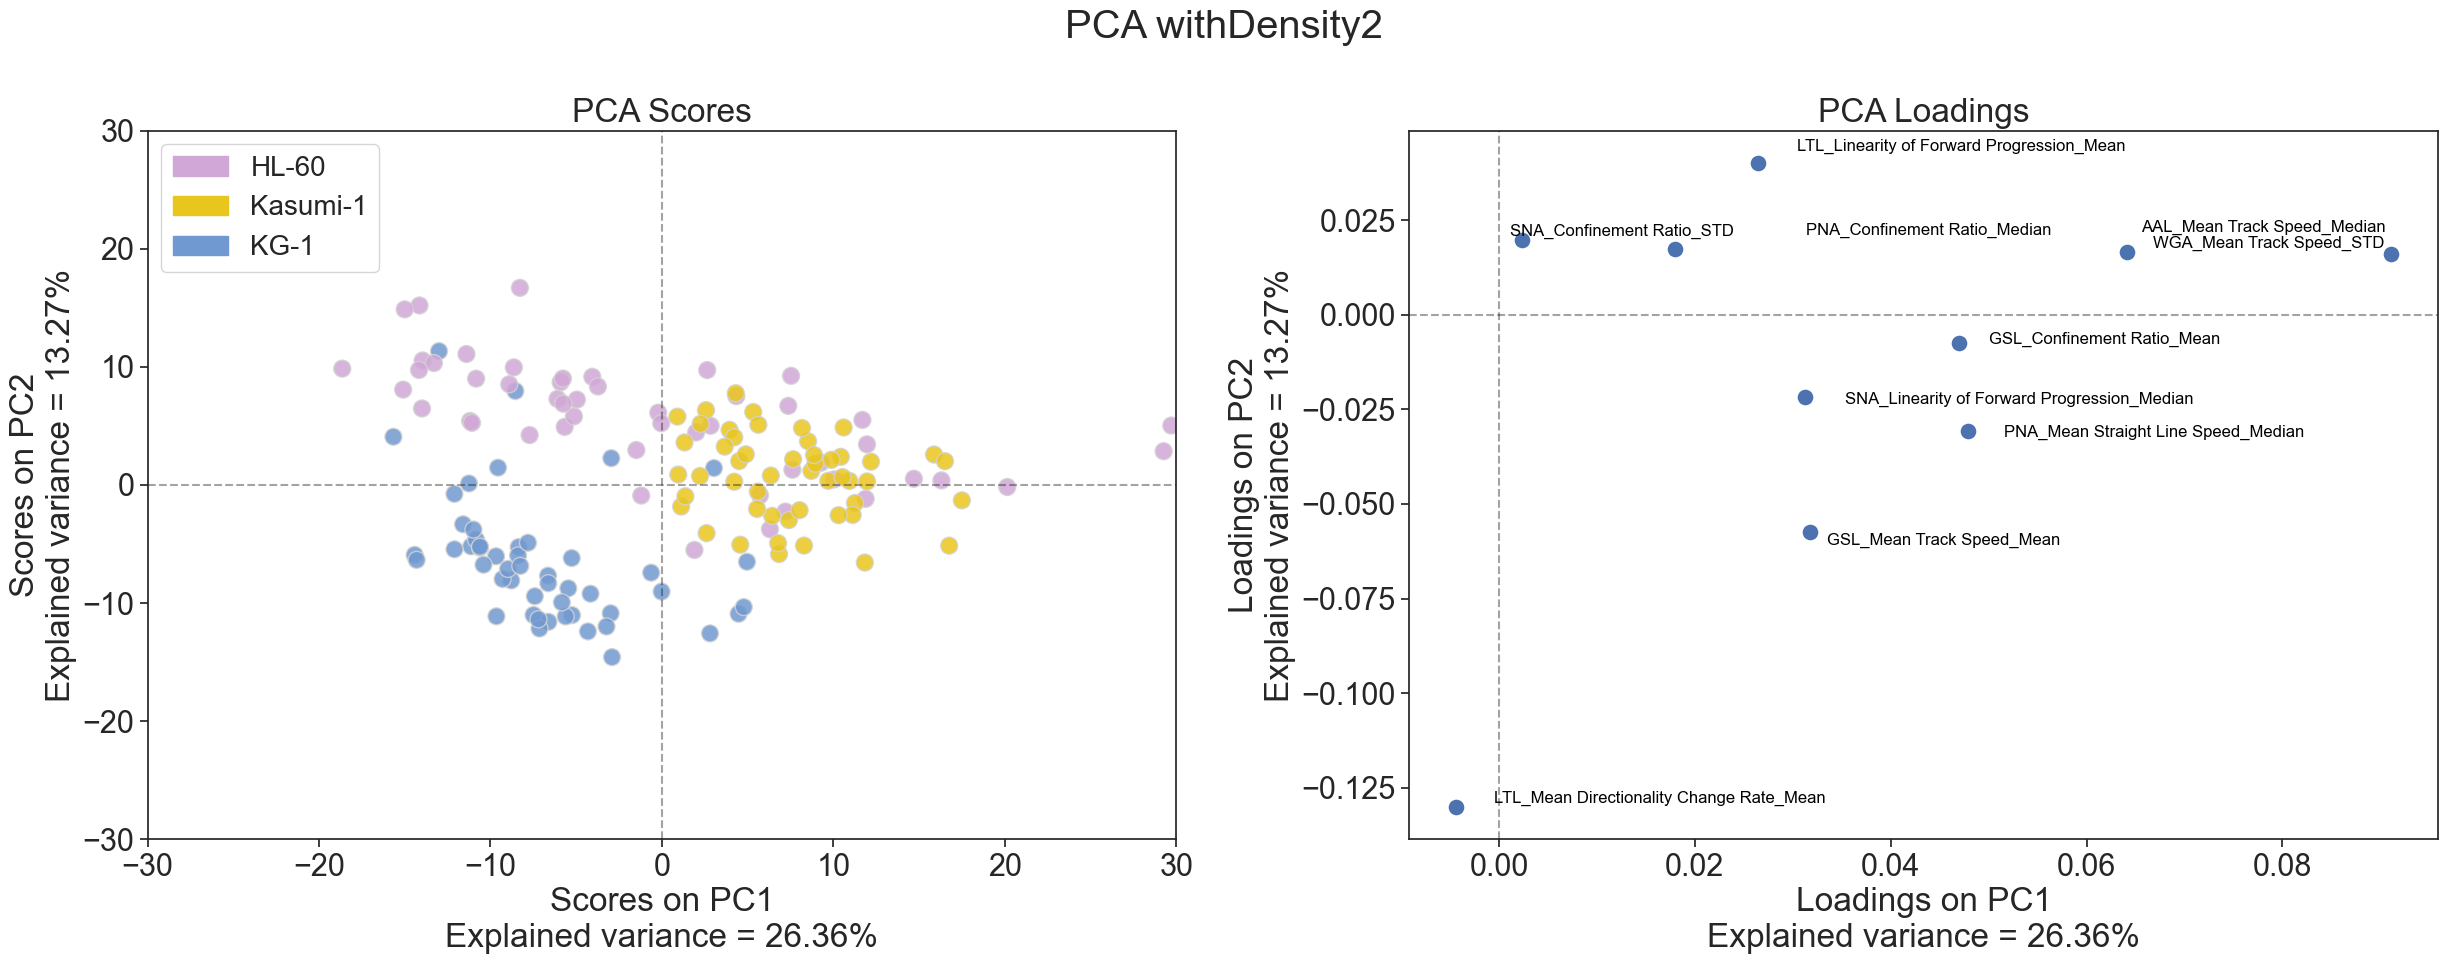

In [68]:
# Generate scores and loadings plot
from adjustText import adjust_text
# Plot the loadings matrix next to the scores
nFeatures = 10 #Features to visualize in the plot
fig, ax = plt.subplots(1,2, figsize=(25,10))

# # Loadings plot
sns.scatterplot(x =loadingsDF.x.head(nFeatures), y = loadingsDF.y.head(nFeatures), data=loadingsDF, ax=ax[1], s=150)
ax[1].title.set_text("PCA Loadings")
ax[1].axhline(0, linestyle='--', color='k', alpha=0.4) # horizontal lines
ax[1].axvline(0, linestyle='--', color='k', alpha=0.4) # vertical lines
ax[1].set_xlabel('Loadings on PC1\nExplained variance = '+str(np.round(pcaTotal.explained_variance_ratio_[0]*100,2))+'%', fontsize=24)
ax[1].set_ylabel('Loadings on PC2\nExplained variance = '+str(np.round(pcaTotal.explained_variance_ratio_[1]*100,2))+'%', fontsize=24)
# ax[1].set_xlim(-1,1)
# ax[1].set_ylim(-1,1)
texts = [plt.text(loadingsDF.iloc[line,0], loadingsDF.iloc[line,1], loadingsDF.index[line], horizontalalignment='left', size=12, color='black') for line in range(nFeatures)] # Add annotation to the loadings
adjust_text(texts) # add arrows to the plot: , arrowprops=dict(arrowstyle='->', color='red'), , only_move='y'

# Scores plot (normal PCA)
sns.scatterplot(x='pca_1', y='pca_2', data=pca_df, hue='label', palette=colorDict, ax=ax[0], alpha=0.85, s=150, edgecolor='lightgrey')
ax[0].title.set_text("PCA Scores")
ax[0].axhline(0, linestyle='--', color='k', alpha=0.4) # horizontal lines
ax[0].axvline(0, linestyle='--', color='k', alpha=0.4) # vertical lines
ax[0].set_xlabel('Scores on PC1\nExplained variance = '+str(np.round(pcaTotal.explained_variance_ratio_[0]*100,2))+'%', fontsize=24)
ax[0].set_ylabel('Scores on PC2\nExplained variance = '+str(np.round(pcaTotal.explained_variance_ratio_[1]*100,2))+'%', fontsize=24)
ax[0].set_xlim(-30,30)
ax[0].set_ylim(-30,30)

#### forced legend ####
values = ['#D0A7D6', '#E9C61D', '#7099D1']
keys = ['HL-60', 'Kasumi-1', 'KG-1']
patch = [(mpatches.Patch(color=values[i], label=keys[i])) for i in range(len(colorDict))] # Markers are rectangles
ax[0].legend(handles = patch, fontsize=20, loc='upper left') # plot legend
##################################

# plt.suptitle("Dataset without the \"Density\" feature")
plt.suptitle('PCA '+string)


plt.tight_layout()

In [69]:
## Save figure ##
Path('PCA').mkdir(parents=True, exist_ok=True)
fig.savefig('PCA'+"/"+'combiplot'+string+".svg", transparent=True, dpi=500, bbox_inches='tight')

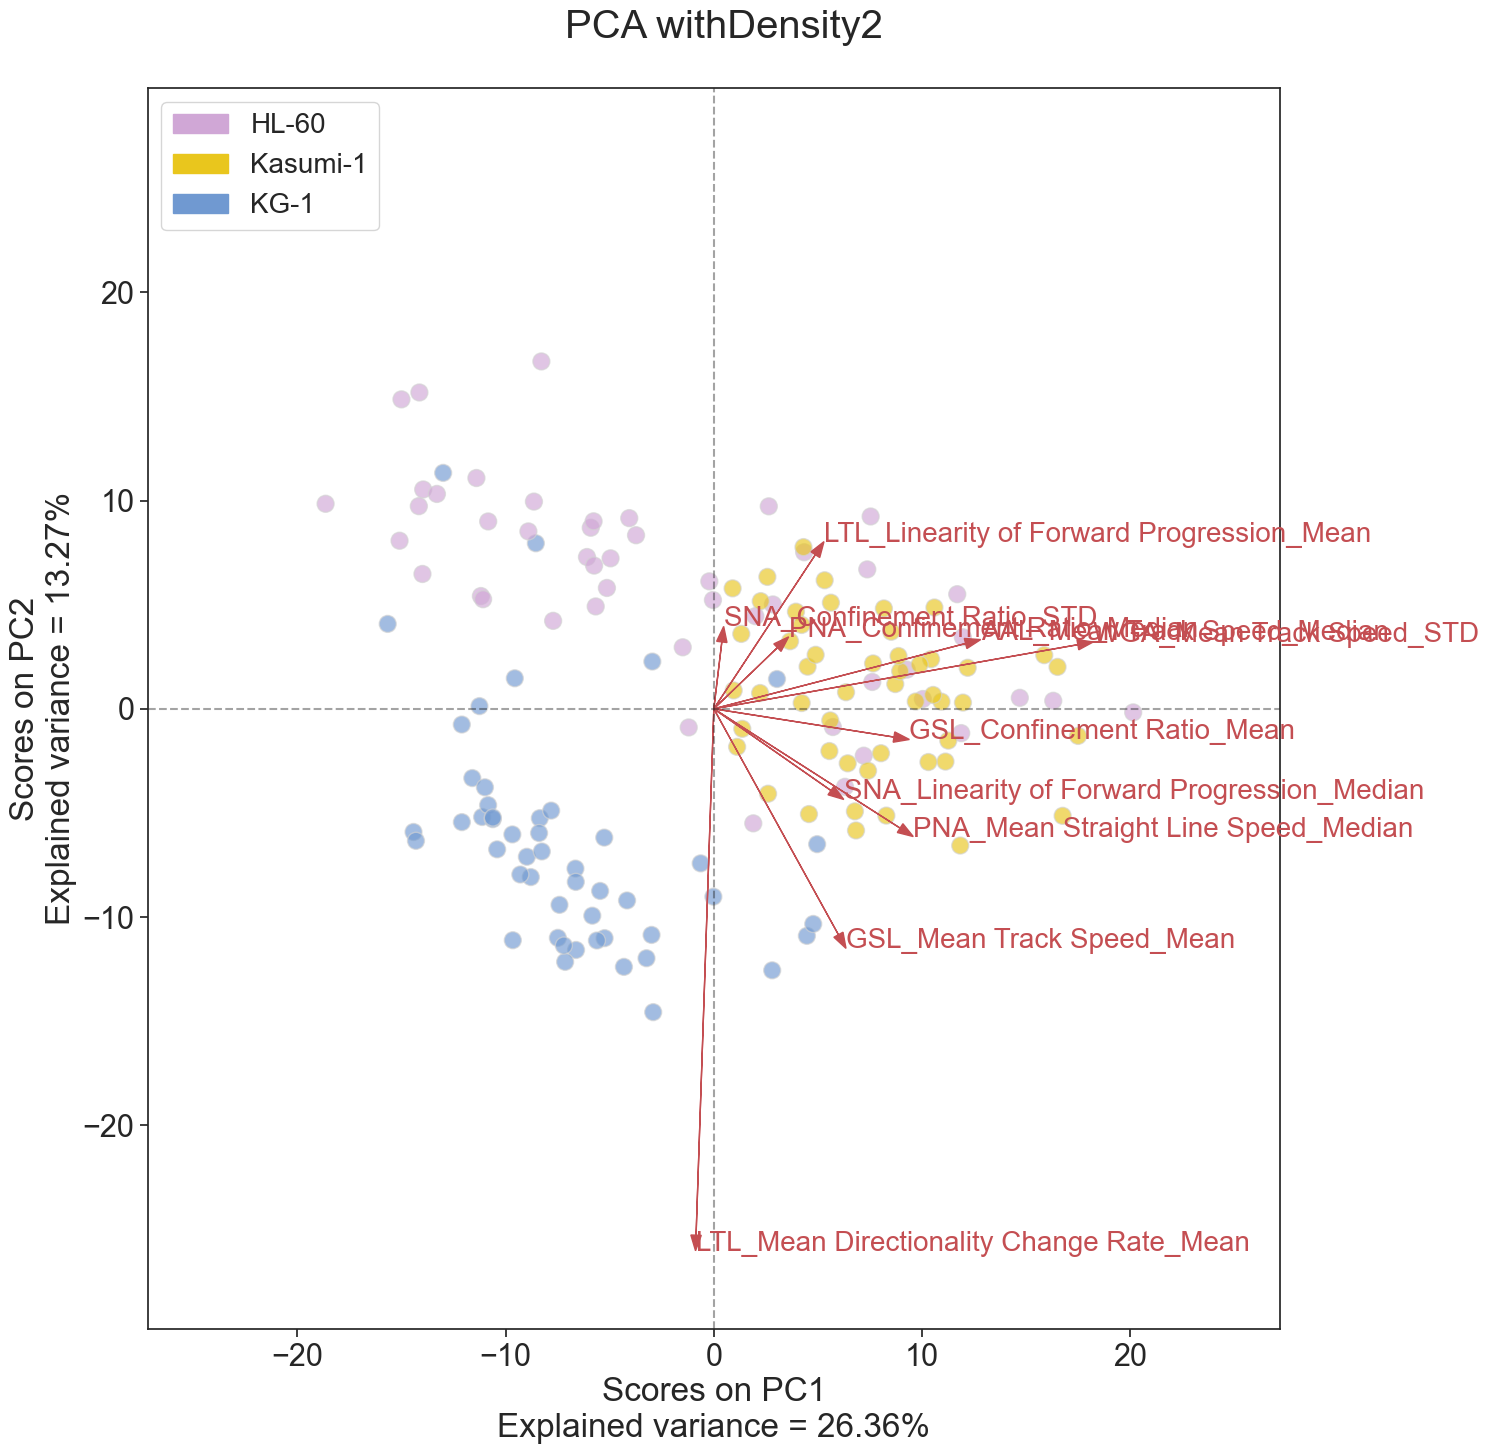

In [75]:
## PCA BIPLOT ##
fig, ax = plt.subplots(1, figsize=(15,15))
sns.set_theme(style="ticks", font_scale=2)
# fig.suptitle("PCA without the \"Density\" feature") # NOTE: change title when changing the dataset
fig.suptitle('PCA '+string)

# Plot scores
f = sns.scatterplot(x='pca_1', y='pca_2', data=pca_df, hue='label', palette=colorDict, ax=ax, alpha=0.65, s=150, edgecolor='lightgrey')
ax.axhline(0, linestyle='--', color='k', alpha=0.4) # horizontal lines
ax.axvline(0, linestyle='--', color='k', alpha=0.4) # vertical lines
ax.set_xlim(-30,30)
ax.set_ylim(-30,30)
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel('Scores on PC1\nExplained variance = '+str(np.round(pcaTotal.explained_variance_ratio_[0]*100,2))+'%', fontsize=24)
plt.ylabel('Scores on PC2\nExplained variance = '+str(np.round(pcaTotal.explained_variance_ratio_[1]*100,2))+'%', fontsize=24)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.legend(title='Cell type')

# Plot loadings
[plt.arrow(0,0,loadingsDF.iloc[i,0]*200, loadingsDF.iloc[i,1]*200, color='r', alpha=1, length_includes_head=True, head_width=0.5) for i in range(nFeatures)] # Multiply by 200 so the arrows are visible in the scores scale
texts = [plt.text(loadingsDF.iloc[line,0]*200, loadingsDF.iloc[line,1]*200, loadingsDF.index[line], horizontalalignment='left', size='small', color='r') for line in range(nFeatures)] # Add annotation to the loadings
# adjust_text(texts) # add arrows to the plot: , arrowprops=dict(arrowstyle='->', color='red'), , only_move='y'


#### forced legend ####
values = ['#D0A7D6', '#E9C61D', '#7099D1']
keys = ['HL-60', 'Kasumi-1', 'KG-1']
patch = [(mpatches.Patch(color=values[i], label=keys[i])) for i in range(len(colorDict))] # Markers are rectangles
plt.legend(handles = patch, fontsize=20, loc='upper left') # plot legend
##################################

fig.tight_layout()
fig1 = plt.gcf() #Get current fig to save it later (plt.show creates a new figure)
plt.show()

In [71]:
## Save figure ##
Path('PCA').mkdir(parents=True, exist_ok=True)
fig.savefig('PCA'+"/"+'biplot'+string+".svg", transparent=True, dpi=500, bbox_inches='tight')

C:\Users\20210014\AppData\Local\Temp\ipykernel_13000\453639009.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figElbow.show()


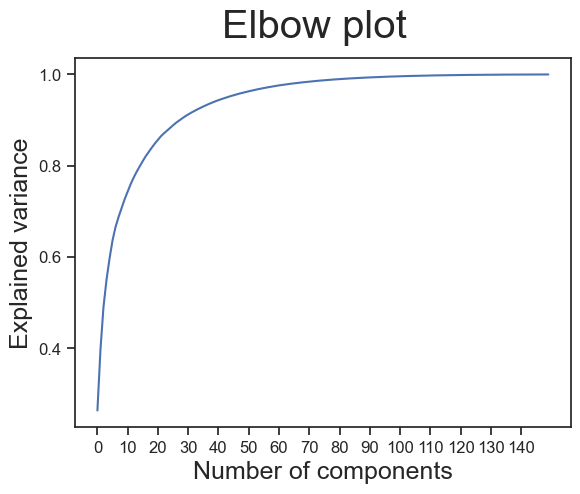

In [72]:
## Elbow plot ##
figElbow, ax = plt.subplots()

ax.set(xticks=np.arange(0, pcaTotal.components_.shape[0], 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.plot(np.cumsum(pcaTotal.explained_variance_ratio_)) # Elbow plot: explained variance by each component

plt.xlabel('Number of components', fontsize=18)
plt.ylabel('Explained variance', fontsize=18)
figElbow.suptitle("Elbow plot")
figElbow.show()

In [73]:
## Save figure ##
Path('PCA').mkdir(parents=True, exist_ok=True)
figElbow.savefig('PCA'+"/"+'elbowPlot'+string+".svg", transparent=True, dpi=500, bbox_inches='tight')